My training of AB emus isn't working... going to explore

In [1]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import numpy as np
from pearce.mocks.kittens import TrainingBox, MDHR

In [3]:
cat = TrainingBox(boxno=0, system = 'sherlock')

In [4]:
cat.load(1.0, HOD = 'corrZheng07', hod_kwargs={'sec_haloprop_key': 'halo_local_density_10'})

/home/users/swmclau2/.local/lib/python2.7/site-packages/halotools/empirical_models/factories/hod_model_factory.py:741: UserWarning: 

The param_dict key sigma_logM appears in more than one component model.
This is permissible, but if you are seeing this message you should be sure you understand it.
In particular, double-check that this parameter does not have conflicting meanings across components.

If you do not wish to see this message every time you instantiate, 
simply attach a _suppress_repeated_param_warning attribute 
to any of your component models and set this variable to ``True``.

  warn(msg % key)
/home/users/swmclau2/.local/lib/python2.7/site-packages/halotools/empirical_models/factories/hod_model_factory.py:741: UserWarning: 

The param_dict key logMmin appears in more than one component model.
This is permissible, but if you are seeing this message you should be sure you understand it.
In particular, double-check that this parameter does not have conflicting meanings acr

In [5]:
cat.halocat.halo_table.colnames

['halo_upid',
 'halo_vx',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_rvir',
 'halo_mvir',
 'halo_id',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density_1',
 'halo_local_density_5',
 'halo_local_density_10',
 'halo_mvir_host_halo']

In [6]:
cat.model.param_dict

{'alpha': 1.06,
 'logM0': 11.38,
 'logM1': 13.31,
 'logMmin': 12.02,
 'mean_occupation_centrals_assembias_corr1': 0.5,
 'mean_occupation_satellites_assembias_corr1': 0.5,
 'sigma_logM': 0.26}

In [7]:
print cat.model.param_dict.keys()

['mean_occupation_centrals_assembias_corr1', 'logMmin', 'logM0', 'sigma_logM', 'mean_occupation_satellites_assembias_corr1', 'logM1', 'alpha']


In [8]:
default_params = cat.model.param_dict
default_params['mean_occupation_centrals_assembias_corr1'] = 0.0
default_params['mean_occupation_satellites_assembias_corr1'] = 0.0
#default_params['mean_occupation_centrals_assembias_split1'] = 0.5
#default_params['mean_occupation_satellites_assembias_split1'] = 0.5

In [9]:
default_params['sigma_logM'] = 0.5
default_params['logMmin'] = 13.5

In [10]:
cat.model.model_dictionary['centrals_occupation'].sec_haloprop_key

'halo_local_density_10'

In [11]:
r_bins = np.logspace(-1.1, 1.6, 19)
rbc = (r_bins[1:]+r_bins[:-1])/2.0

In [12]:
#default_y = np.zeros((18,))
#for i in xrange(N):
#    print i,
cat.populate(default_params)
default_y= cat.calc_xi(r_bins)
#default_y/=N

In [21]:
N = 7
cmap = sns.color_palette("GnBu_d", N)

-1.0 0.214790701842
-0.666666666667 0.433238235771
-0.333333333333 0.684017925258
0.0 0.998591122735
0.333333333333 1.3354344988
0.666666666667 1.70859283356
1.0 2.15095702024


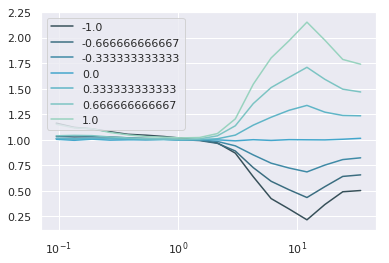

In [22]:
pname = 'mean_occupation_centrals_assembias_corr1'
l, h = -1.0, 1.0
#l, h = 0.0, 1.0

d = default_params.copy()
for v, c in zip(np.linspace(l,h,N), cmap):
    d[pname] = v
    #y = np.zeros((18,))
    #for i in xrange(N):
       # print i,
    cat.populate(d)
    y= cat.calc_xi(r_bins)
    print v, (y/default_y)[14]
    #y/=N
    plt.plot(rbc, y/default_y, label = v, c = c)
    
plt.xscale('log')
#plt.loglog()
plt.legend(loc = 'best')
plt.show();

In [15]:
from halotools.empirical_models.abunmatch.noisy_percentile import noisy_percentile
from scipy.stats import rankdata

In [16]:
N =11
x=(rankdata(np.linspace(0,10,N), 'ordinal')*1.0)/N# - 0.5

In [17]:
print x
print noisy_percentile(x, -1)

[ 0.09090909  0.18181818  0.27272727  0.36363636  0.45454545  0.54545455
  0.63636364  0.72727273  0.81818182  0.90909091  1.        ]
[ 0.09090909  0.18181818  0.27272727  0.36363636  0.45454545  0.54545455
  0.63636364  0.72727273  0.81818182  0.90909091  1.        ]


In [18]:
x[::-1]

array([ 1.        ,  0.90909091,  0.81818182,  0.72727273,  0.63636364,
        0.54545455,  0.45454545,  0.36363636,  0.27272727,  0.18181818,
        0.09090909])

(array([  1.01000000e+02,   3.71800000e+03,   4.59880000e+04,
          5.68025000e+05,   3.85037000e+06,   4.64361300e+06,
          7.20414000e+05,   8.40740000e+04,   4.30800000e+03,
          6.00000000e+01]),
 array([-2.52582169, -1.57553906, -0.62525644,  0.32502618,  1.2753088 ,
         2.22559142,  3.17587404,  4.12615666,  5.07643929,  6.02672191,
         6.97700453]),
 <a list of 10 Patch objects>)

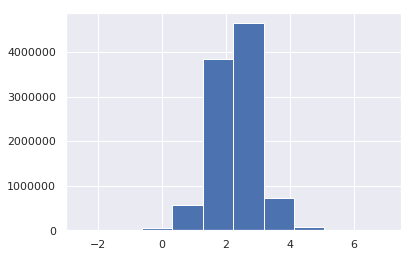

In [19]:
plt.hist(np.log(cat.halocat.halo_table['halo_nfw_conc'][np.isfinite(cat.halocat.halo_table['halo_nfw_conc'])] ))